# Lernen im mehrschichtigen Netz
## 0. Wichtige Bezeichnungen im folgenden Text
* Netzeingaben: x
* Zielwerte (Target): t
* Gewichte: w
* Netzinput x * w: net
* Berechnete Ausgabe des Netzes: y = O<sub>out</sub>
* Fehler: E
* Ableitung des Fehlers (Gradient): E'
+ Gewichtsänderung: w_delta

## 1. Berechnung der Fehler
Der Fehler bezeichnet die Abweichung des durch das Netz berechneten Wertes y vom gewünschten Wert t. Damit konnten dann die Gewichte angepasst werden. Bisher genügte dazu die Differenz  (t-y). Genauso gut kann man auch den quadratischen Fehler  1/2(t - y)² benutzen. Der Vorteil besteht darin, dass sich große Abweichungen vom Target stärker auswirken als kleine und dass die Differenzen nicht negativ werden. Der Faktor 0,5 hat nur kosmetische Gründe.

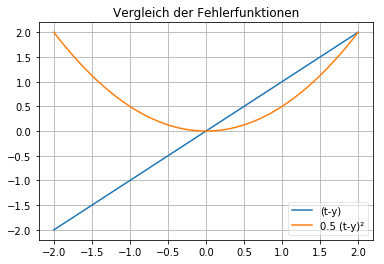

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# zum Anzeigen
%matplotlib inline 
fig, ax1 = plt.subplots()
xs =  np.linspace(-2, 2, 50, endpoint=True)
ys =  0.5 *xs*xs
ax1.plot(xs, xs, label="(t-y)")
ax1.plot(xs,ys, label="0.5 (t-y)²")
ax1.set_title('Vergleich der Fehlerfunktionen')
ax1.grid(True)
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.5)

## Gradientenabstieg mit nur einem Gewicht
Die Grundidee besteht darin, die Richtung zu finden, in der der Fehler abnimmt. Für die abgebildete quadratische Fehlerfunktion besteht die Lösung einfach in der Ableitung. Deren Betrag wächst mit der Entfernung zum Minimum. In unserem Beispiel hängen die Ausgabe und damit der Fehler nur von einer Eingabe x und einem Gewicht w ab: y = wx. 
Damit ergibt sich für den Fehler E: <span class="math">$$E = \frac {1}{2} (t - y)^2 = \frac {1}{2} (y-w\cdot x)^2 $$ </span> 
Da der Fehler vom Gewicht w abhängt, wird die Ableitung nach dem Gewicht berechnet:
<span class="math">$$E' = (-1)\cdot x\cdot (t - y) $$ </span> 
Die Anpassung der Gewichte muss entgegen der Richtung der Ableitung erfolgen, also wird diese Gleichung mit (-1) multipliziert:
<span class="math">$$(-1)\cdot E' = (-1)\cdot(-1)\cdot x\cdot (t- y) =x\cdot (t - y)  $$ </span> 
Damit ergibt sich für die Anpassung des Gewichts:
<span class="math">$$w_{neu}  = w_{alt} + x\cdot (t - y) $$ </span> 
Beispiel für einen Gradientenabstieg mit einem einfachen neuronalen Netz, das die Identitätsfunktion "erlernen" soll.


Input x = 0.200000, Gewünschter Output y = 0.20
Iter	x	w	net i	a	y	t	E	E'	w delta
0	0.2	-10.00	-2.00	-2.00	-2.00	0.20	2.42	-0.44	0.44
10	0.2	-6.31	-1.26	-1.26	-1.26	0.20	1.07	-0.29	0.29
20	0.2	-3.86	-0.77	-0.77	-0.77	0.20	0.47	-0.19	0.19
30	0.2	-2.23	-0.45	-0.45	-0.45	0.20	0.21	-0.13	0.13
40	0.2	-1.15	-0.23	-0.23	-0.23	0.20	0.09	-0.09	0.09
50	0.2	-0.43	-0.09	-0.09	-0.09	0.20	0.04	-0.06	0.06
60	0.2	0.05	0.01	0.01	0.01	0.20	0.02	-0.04	0.04
70	0.2	0.37	0.07	0.07	0.07	0.20	0.01	-0.03	0.03
80	0.2	0.58	0.12	0.12	0.12	0.20	0.00	-0.02	0.02
90	0.2	0.72	0.14	0.14	0.14	0.20	0.00	-0.01	0.01
100	0.2	0.81	0.16	0.16	0.16	0.20	0.00	-0.01	0.01
110	0.2	0.88	0.18	0.18	0.18	0.20	0.00	-0.00	0.00


Text(0.5,0,'Gewicht')

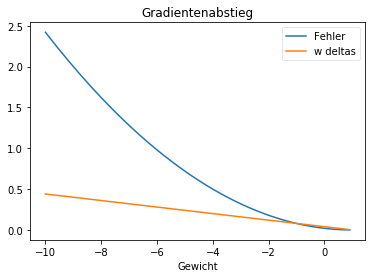

In [4]:
def func_id(x):  
        return x 
# Initialisierungen
x = 0.2
y = x
# Startgewicht
weight = -10.0
# Für den Plot
weights = []
errors = []
w_deltas = []
# Print Überschrift
print("Input x = {:.6f}, Gewünschter Output y = {:.2f}".format(x,y))
print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}"
          .format('Iter', 'x','w','net i',
                  'a','y','t','E',"E'",'w delta'))
# Fixe 120 Schritte
for step in range(120):
    # Net input berechnen    
    net_i = weight * x
    # Aktivierung (identische Funktion)    
    activation = func_id(net_i)
    # Errechneter Output    
    y = activation
    # Quadratischer Fehler: Gewünschter - Errechneter Output    
    error = 0.5*(t - y)**2
    # Gradient    
    derivative = (-1.0)*x*(t - y)
    # Delta für Gewichtsanpassung    
    w_delta = (-1)*derivative
    # Daten für den Plot (weight,error)
    weights.append(weight)
    errors.append(error)
    w_deltas.append(w_delta)
    # Ausgabe der Änderungen alle 10 Schritte    
    if step % 10 == 0:
        print("{}\t{}\t{:.2f}\t{:.2f}\t{:.2f}"
              "\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}"
          .format(step, x,weight,net_i,activation,y,
                  t,error,derivative,w_delta)) 
    # Dafür machen wir das alles: Gewichtsanpassung = Lernen        
    weight += w_delta

### Plot erzeugen
# Figure und Subplot
fig, ax1 = plt.subplots()
ax1.plot(weights, errors, label="Fehler")
ax1.plot(weights,w_deltas, label="w deltas")
# Titel
ax1.set_title('Gradientenabstieg')
# Legende
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.5)
# Label
plt.xlabel('Gewicht')


## Gradientenabstieg allgemein
Erst wenn mehrere Gewichte den Fehler beeinflussen, ist der Gradientenabstieg als Verfahren nötig. Möchte man den Einfluss der einzelnen Gewichte auf den Fehler berechnen, muss man den Fehler-Gradienten bilden, einen Vektor, der die Ableitung des Fehlers nach den einzelnen Gewichten beinhaltet. Dieser Vektor gibt die Richtung des größten Anstiegs an und kann dadurch genutzt werden, den Fehler schrittweise zu minimieren. 
Dabei gilt für die Gewichtskorrektur der Gewichte zwischen der Schicht i und der Schicht j:

<span class="math">$$w_{ji}^{neu}= w_{ji}^{alt} +\Delta w_{ji}  $$ 
    $$\Delta w_{ji}= \eta \cdot \delta w_j \cdot o_j $$     </span> 
Dabei ist Eta der Lernfaktor, o<sub>i</sub> der Output des Neurons und delta die Ableitung des Fehlers nach dem Gewicht.
<span class="math">$$\delta_j= \frac {\delta E}{\delta w_{ji}} $$  mit  
    $$ E = \frac {1}{2} (t- y)^2$$ , wobei das ergibt
    $$\delta_j= \frac {\delta(\frac {1}{2} (t- FO)^2)}{\delta w_{ji}} $$ und mit der Kettenregel
    $$\delta_j= (-1)\cdot (t - FO) \cdot \frac {\delta FO}{\delta w_{ji}} $$
    
   
    
    
    
    
    
   